In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df=pd.read_csv("dateset_org.csv")
data=df[:8000].copy()
test_data=df[8000:].copy()

In [ ]:
data.isnull().values.any()

False

In [ ]:
def tweet_processing(raw_tweet):
    letters_only=re.sub("[^a-zA-Z]"," ",raw_tweet)
    words=letters_only.lower().split()
    stops=set(stopwords.words("english"))
    m_w=[w for w in words if not w in stops]
    return (" ".join(m_w))

In [ ]:
num_tweets=data["sentence"].size
clean_tweet=[]
for i in range(0,num_tweets):
    clean_tweet.append(tweet_processing(data["sentence"][i]))
data["sentence"]=clean_tweet 


num_tweets_test=test_data["sentence"].size
clean_tweet_test=[]
for i in range(num_tweets,num_tweets+num_tweets_test):
    clean_tweet_test.append(tweet_processing(test_data["sentence"][i]))
test_data["sentence"]=clean_tweet_test

In [ ]:
X_train, X_test_svm, Y_train, Y_test_svm = train_test_split(df.sentence, df.label, test_size=0.2)

In [ ]:
vectorizer=CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,stop_words = None,max_features = 5000)

#x_train = vectorizer.fit_transform(x_train.ravel())
train_data_features=vectorizer.fit_transform(X_train)
train_data_features=train_data_features.toarray()

test_data_features=vectorizer.transform(X_test_svm)
test_data_features=test_data_features.toarray()

# SVM RBF

In [ ]:
clf=svm.SVC(kernel='rbf',C=1.0)
print ("Training")
clf.fit(train_data_features,Y_train)

print ("Testing")
predicted=clf.predict(test_data_features)
accuracy=np.mean(predicted==Y_test_svm)
print ("Accuracy: ",accuracy)

Training
Testing
Accuracy:  0.8375433382862804


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
score_svm=precision_recall_fscore_support(Y_test_svm, predicted, average='weighted')
print(score_svm)

(0.8382852010176413, 0.8375433382862804, 0.8375517075421415, None)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test_svm, predicted)
print(cm)
accuracy_score(Y_test_svm, predicted)

[[843 143]
 [185 848]]


0.8375433382862804

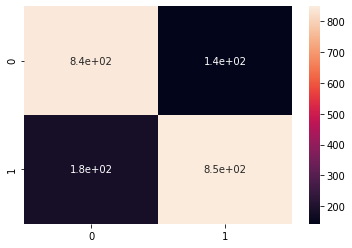

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

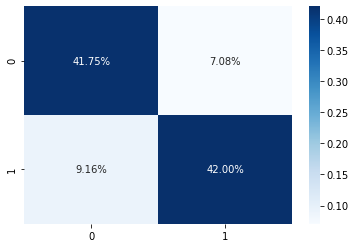

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')